# Narrative Autoscoring Evaluation Report
### Score Analysis and LLM-Human Agreement
This notebook contains visual summaries and insights from the narrative scoring evaluation across five writing dimensions:
- Establishing Setting, Point of View, and Characters
- Narrative Techniques
- Theme/Message
- Coherence (Organization)
- Audience Appeal

Charts illustrate how frequently the LLM scoring matches or mismatches human evaluation (overrated, underrated, or aligned).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "新建 XLSX 工作表 (4).xlsx"
xls = pd.ExcelFile(file_path)

# Load sheets
score_df = xls.parse('score_agreement')
rating_df = xls.parse('underrating_overrating_matching')

**Show detail Score Agreements**

In [2]:
score_df

,Grade,"Establishing Setting, Point of View, and Characters",Narrative Techniques,Theme/Message,Coherence (Organization),Audience Appeal
0,3,35/40,37/40,39/40,39.5/40,29.5/40
1,4,25/39,30/39,34/39,31/39,22.5/39
2,5,26/40,34/40,34/40,35.5/40,11/40
3,6,29.5/40,34/40,23.5/40,33/40,21.5/40
4,7,33/39,36/39,32/39,32.5/39,30.5/39
5,8,36.5/40,30.5/40,34.5/40,31/40,18.5/40
6,9,31.5/40,35/40,29.5/40,29.5/40,26/40
7,10,34.5/40,34.5/40,35.5/40,26.5/40,26.5/40
8,11,34.5/40,38/40,39/40,38.5/40,32.5/40
9,12,38.5/40,39.5/40,40/40,39.5/40,28.5/40


**Show Rating Distribution**

In [3]:
rating_df

,Grade,"Establishing Setting, Point of View, and Characters underrating/overrating/matching",Narrative Techniques underrating/overrating/matching,Theme/Message underrating/overrating/matching,Coherence (Organization) underrating/overrating/matching,Audience Appeal underrating/overrating/matching
0,3,0\8\32,1\4\35,0\1\39,0\1\39,20\0\20
1,4,0\14\25,1\8\30,0\4\35,2\7\30,20\2\17
2,5,3\14\23,4\0\36,4\1\35,0\1\39,25\1\14
3,6,0\11\29,1\3\36,1\13\26,3\4\33,24\1\15
4,7,0\2\37,0\1\38,0\5\34,1\5\33,8\0\31
5,8,3\1\36,8\0\32,3\2\35,6\1\33,22\0\18
6,9,2\7\31,3\2\35,4\6\30,9\2\29,17\0\23
7,10,3\2\35,3\2\35,1\3\36,9\3\28,9\1\30
8,11,1\4\35,0\1\39,1\1\38,1\2\37,10\1\29
9,12,0\1\39,0\0\40,0\0\40,0\0\40,20\0\20


In [4]:
# Clean and transform score data
score_df_clean = score_df[score_df['Grade'] != 'Total'].copy()
criteria_cols = score_df_clean.columns[1:]

for col in criteria_cols:
    extracted = score_df_clean[col].str.extract(r'(?P<score>\d+(\.\d+)?)/(?P<total>\d+)')
    score_df_clean[col] = (extracted['score'].astype(float) / extracted['total'].astype(float)) * 100

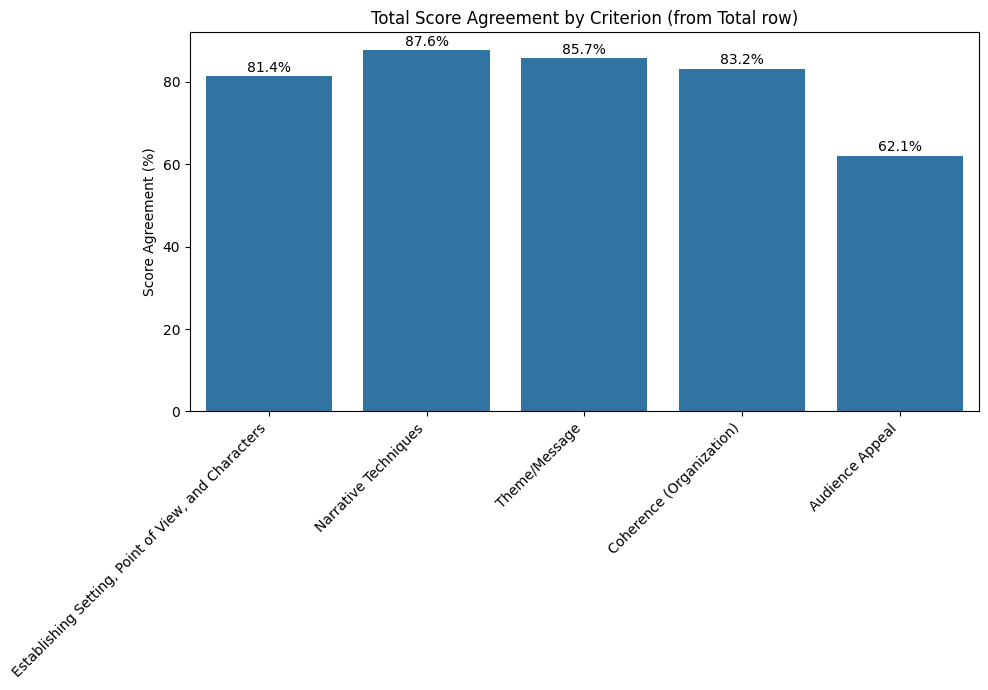

In [5]:
score_df_total = score_df[score_df['Grade'] == 'Total'].copy()
total_score_pct = {}
for col in criteria_cols:
    score_str = score_df_total[col].values[0]
    score, total = map(float, score_str.split('/'))
    total_score_pct[col] = (score / total) * 100

# Plot bar chart of total score agreement
plt.figure(figsize=(10, 7))
bars = sns.barplot(x=list(total_score_pct.keys()), y=list(total_score_pct.values()))
plt.title('Total Score Agreement by Criterion (from Total row)')
plt.ylabel('Score Agreement (%)')
plt.xticks(rotation=45, ha='right')
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}%', ha='center')
plt.tight_layout()
plt.show()

**Grade Specific Score Agreement**

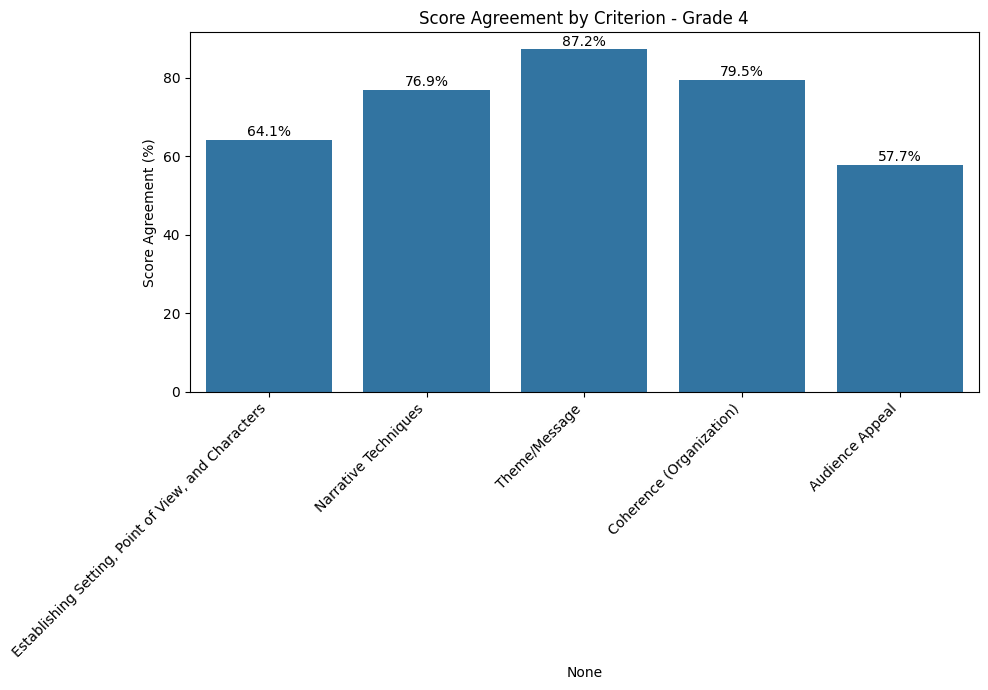

In [6]:
grade_to_plot = 4
grade_row = score_df_clean[score_df_clean['Grade'] == grade_to_plot].iloc[0]

# Extract score agreement for this grade
grade_scores = grade_row[criteria_cols]

# Plot bar chart for Grade 6
plt.figure(figsize=(10, 7))
bars = sns.barplot(x=criteria_cols, y=grade_scores.values)
plt.title(f'Score Agreement by Criterion - Grade {grade_to_plot}')
plt.ylabel('Score Agreement (%)')
plt.xticks(rotation=45, ha='right')
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}%', ha='center')
plt.tight_layout()
plt.show()

**All Grade Score Agreement**

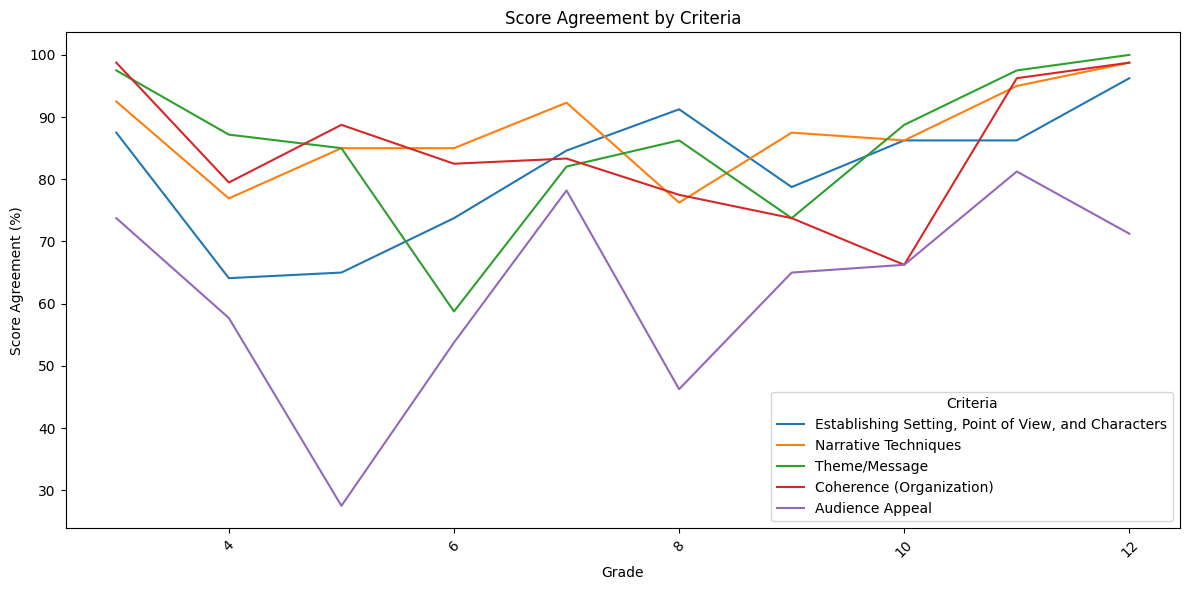

In [7]:
plt.figure(figsize=(12, 6))
for col in criteria_cols:
    sns.lineplot(x=score_df_clean['Grade'], y=score_df_clean[col], label=col)
plt.title('Score Agreement by Criteria')
plt.ylabel('Score Agreement (%)')
plt.xlabel('Grade')
plt.legend(title='Criteria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
criteria_columns_comp = [col for col in rating_df.columns if 'underrating/overrating/matching' in col]

comparison_data = []
for _, row in rating_df.iterrows():
    for col in criteria_columns_comp:
        val = row[col]
        if isinstance(val, str) and '\\' in val:
            parts = val.strip().split('\\')
            if len(parts) == 3:
                underrating, overrating, matching = map(int, parts)
                comparison_data.append({
                    'Grade': str(row['Grade']),
                    'Criterion': col.replace(' underrating/overrating/matching', ''),
                    'Underrating': underrating,
                    'Overrating': overrating,
                    'Matching': matching
                })

# Create comp_df
comp_df = pd.DataFrame(comparison_data)
comp_df = comp_df[comp_df['Grade'] != 'Total']

Total Responses per Criterion - Grade 12:


<ipython-input-10-1164184983>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_grade_df['Total Responses'] = single_grade_df[['Underrating', 'Overrating', 'Matching']].sum(axis=1)


,Criterion,Total Responses
45,"Establishing Setting, Point of View, and Chara...",40
46,Narrative Techniques,40
47,Theme/Message,40
48,Coherence (Organization),40
49,Audience Appeal,40


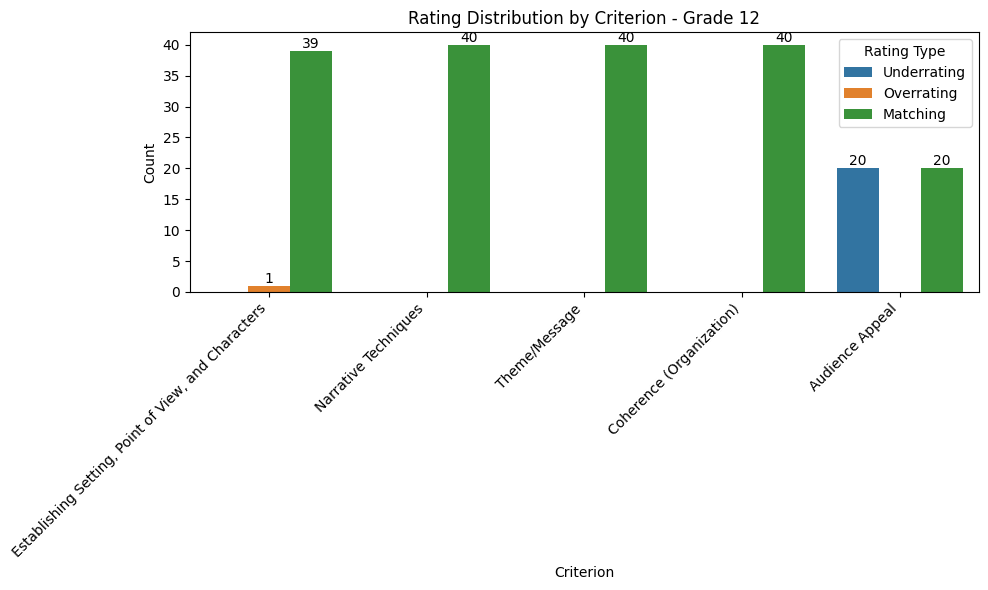

In [10]:
grade_to_plot = "12"
single_grade_df = comp_df[comp_df['Grade'] == grade_to_plot]

# Melt for plotting
melted_single = single_grade_df.melt(id_vars='Criterion',
                                     value_vars=['Underrating', 'Overrating', 'Matching'],
                                     var_name='Rating Type', value_name='Count')

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=melted_single, x='Criterion', y='Count', hue='Rating Type')
plt.title(f'Rating Distribution by Criterion - Grade {grade_to_plot}')
plt.xticks(rotation=45, ha='right')

# Add labels
for bar in barplot.patches:
    height = bar.get_height()
    if height > 0:
        barplot.annotate(f'{int(height)}',
                         (bar.get_x() + bar.get_width()/2, height),
                         ha='center', va='bottom')

# Show total responses
single_grade_df['Total Responses'] = single_grade_df[['Underrating', 'Overrating', 'Matching']].sum(axis=1)
print(f"Total Responses per Criterion - Grade {grade_to_plot}:")
display(single_grade_df[['Criterion', 'Total Responses']])

plt.tight_layout()
plt.show()

Total Responses per Criterion:


,Criterion,Total Responses
0,Audience Appeal,398
1,Coherence (Organization),398
2,"Establishing Setting, Point of View, and Chara...",398
3,Narrative Techniques,398
4,Theme/Message,398


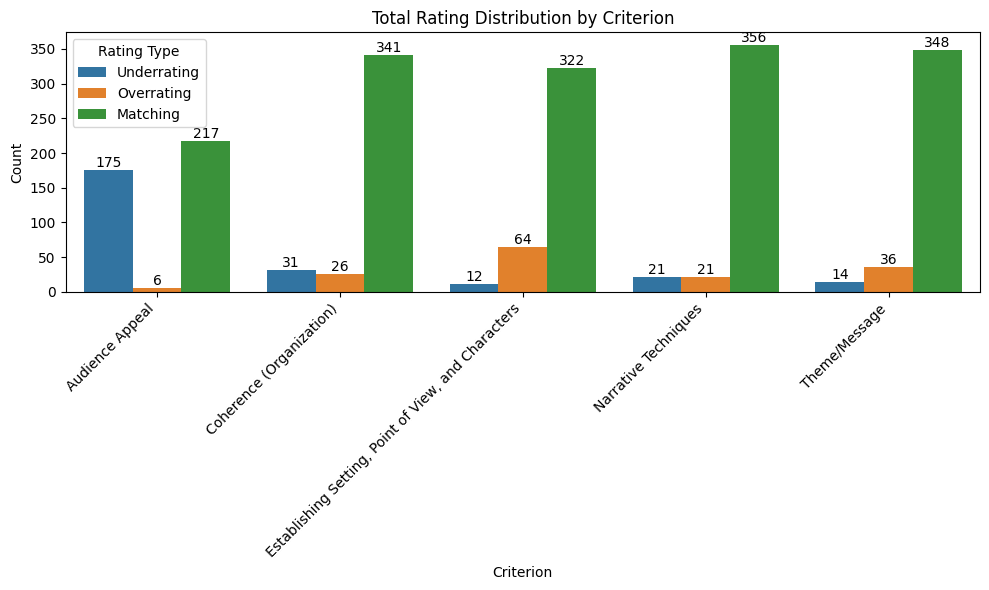

In [11]:
total_rating = comp_df.groupby('Criterion')[['Underrating', 'Overrating', 'Matching']].sum().reset_index()

# Melt for plotting
total_rating_melted = total_rating.melt(id_vars='Criterion',
                                        value_vars=['Underrating', 'Overrating', 'Matching'],
                                        var_name='Rating Type', value_name='Count')

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=total_rating_melted, x='Criterion', y='Count', hue='Rating Type')
plt.title('Total Rating Distribution by Criterion')
plt.xticks(rotation=45, ha='right')

# Add number labels on bars
for bar in barplot.patches:
    height = bar.get_height()
    if height > 0:
        barplot.annotate(f'{int(height)}',
                         (bar.get_x() + bar.get_width()/2, height),
                         ha='center', va='bottom')

# Show total responses per criterion
total_rating['Total Responses'] = total_rating[['Underrating', 'Overrating', 'Matching']].sum(axis=1)
print("Total Responses per Criterion:")
display(total_rating[['Criterion', 'Total Responses']])

plt.tight_layout()
plt.show()